In [ ]:
import os
from os import listdir
from PIL import Image
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np

import pickle
import cv2

In [ ]:
pip install numpy==1.25.0

In [ ]:
pip install --upgrade tensorflow

# New Section

In [ ]:
pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet

In [ ]:
import os
from os import listdir
from PIL import Image
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np

import pickle
import cv2

In [ ]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
MyFaceNet = FaceNet()

In [ ]:
from PIL import Image as Img

In [ ]:
folder='photoAlbum/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)

    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

    if len(wajah)>0:
        x1, y1, width, height = wajah[0]
    else:
        x1, y1, width, height = 1, 1, 10, 10

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)
    gbr_array = asarray(gbr)

    face = gbr_array[y1:y2, x1:x2]

    face = Img.fromarray(face)
    face = face.resize((160,160))
    face = asarray(face)

    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)

    database[os.path.splitext(filename)[0]]=signature



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [ ]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [ ]:
database

{'Unknown': array([[-1.47954039e-02,  3.01177837e-02, -1.95943434e-02,
          4.45848703e-02,  8.71154759e-03, -1.90568492e-02,
          2.08720900e-02,  4.20465954e-02, -4.91031259e-02,
          6.87715486e-02,  6.89499602e-02,  2.22150199e-02,
          5.05290329e-02, -6.36439770e-02,  1.77195445e-02,
         -1.39262015e-02, -7.88838789e-02, -3.47533785e-02,
          2.48957183e-02,  1.60942804e-02, -3.87579687e-02,
          7.32209235e-02, -3.51649821e-02, -7.28811622e-02,
          2.11267509e-02,  2.59195846e-02,  1.81420203e-02,
         -7.40036368e-02,  1.54770371e-02, -1.25208907e-02,
         -1.32550215e-02,  7.47596323e-02,  4.75348830e-02,
          1.04528386e-02, -1.13704791e-02, -2.22912729e-02,
          1.86705403e-02, -2.29450203e-02,  3.65724079e-02,
         -1.01309270e-02, -1.87549870e-02, -3.90528031e-02,
          8.54223371e-02, -1.53906131e-02, -5.29359430e-02,
          6.38983548e-02, -7.29433000e-02, -2.16266606e-02,
         -1.10577485e-02, -3.

In [ ]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [ ]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [ ]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h

      face = gbr_array[y1:y2, x1:x2]

      face = Img.fromarray(face)
      face = face.resize((160,160))
      face = asarray(face)

      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)
      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key

      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)

  return filename



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename



<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Saved to photo.jpg


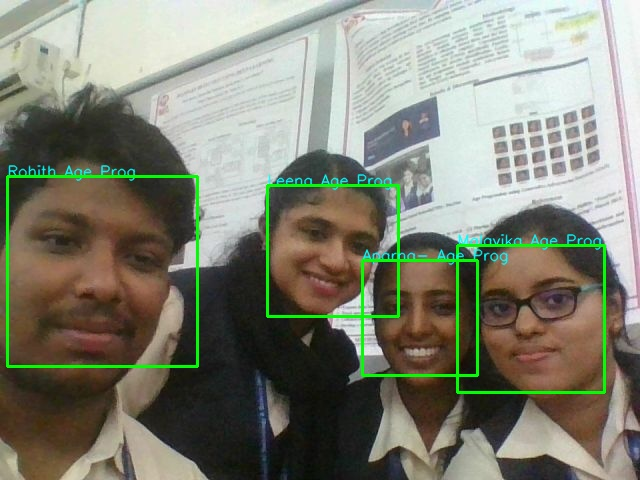

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import os

# Path of the video file
video_path = "/content/Leena_Sherin.mp4"
video_name = os.path.splitext(os.path.basename(video_path))[0]  # Extracting the video name without extension

vidcap = cv2.VideoCapture(video_path)

# Get the FPS (frames per second) of the video
fps = vidcap.get(cv2.CAP_PROP_FPS)

# Calculate frame interval for a 1-second gap
frame_interval = int(fps)

success, image = vidcap.read()
count = 0
frame_number = 0

while success:
    if frame_number % frame_interval == 0:
        # Write the current frame to a file with the video name prefix
        cv2.imwrite(f"/content/Leena Age Prog/{video_name}_{count}.png", image)

        # Increment the frame counter
        count += 1

    # Read the next frame
    success, image = vidcap.read()

    # Increment frame number
    frame_number += 1

# Release the video capture object
vidcap.release()

In [ ]:
import cv2
import os

# Path of the video file
video_path = "/content/Person1.mp4"
video_name = os.path.splitext(os.path.basename(video_path))[0]  # Extracting the video name without extension

vidcap = cv2.VideoCapture(video_path)

# Get the FPS (frames per second) of the video
fps = vidcap.get(cv2.CAP_PROP_FPS)

# Calculate frame interval for a 1-second gap
frame_interval = int(fps)

success, image = vidcap.read()
count = 0
frame_number = 0

while success:
    if frame_number % frame_interval == 0:
        # Write the current frame to a file with the video name prefix
        cv2.imwrite(f"/content/Person1 Age Prog/{video_name}_{count}.png", image)

        # Increment the frame counter
        count += 1

    # Read the next frame
    success, image = vidcap.read()

    # Increment frame number
    frame_number += 1

# Release the video capture object
vidcap.release()